In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

In [3]:
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [4]:
X_inliers.shape

(200, 2)

In [5]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

In [6]:
X.shape

(220, 2)

In [7]:
n_outliers = len(X_outliers)

In [8]:
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [9]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [11]:
X_scores.shape

(220,)

In [18]:
(y_pred == -1).sum()

22

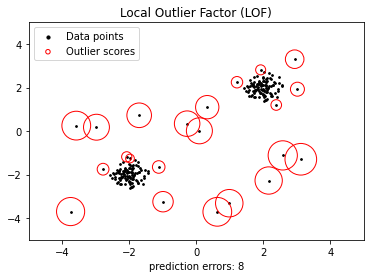

In [17]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3, label='Data points')
radius = (X_scores.max() - X_scores[y_pred == -1]) / (X_scores.max() - X_scores.min())
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()